<a href="https://colab.research.google.com/github/TruongVuGoBrrrrr/BaiTapAI20104074/blob/BTVN-NhanDien/NhanDienKhuonMat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
train_image = '/content/drive/MyDrive/Data Train/Khuon mat/Train'
valid_image = '/content/drive/MyDrive/Data Train/Khuon mat/Val'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_datagen.flow_from_directory(train_image,target_size=(200,200),class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(valid_image,target_size=(200,200),class_mode='categorical')

Found 75 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [4]:
x_train,y_train=next(train_set)
x_train.shape

(32, 200, 200, 3)

In [5]:
y_train.shape

(32, 3)

In [6]:
label=['Hưng','Linh','Vũ']

In [7]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras.layers import Conv2D, MaxPooling2D

In [8]:
mod = models.Sequential()
mod.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))

In [9]:
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Flatten())
mod.add(Dense(128,activation='relu'))
mod.add(Dense(3,activation='softmax'))

In [10]:
mod.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history=mod.fit(train_set,epochs=20,batch_size=128,verbose=1, validation_data=validation_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/20
3/3 [==============================] - 38s 14s/step - loss: 2.1850 - accuracy: 0.4267 - val_loss: 1.4010 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 12s 3s/step - loss: 1.1311 - accuracy: 0.5333 - val_loss: 0.9681 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 14s 4s/step - loss: 0.8879 - accuracy: 0.4400 - val_loss: 0.6602 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 15s 6s/step - loss: 0.5176 - accuracy: 0.9467 - val_loss: 0.2976 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 12s 3s/step - loss: 0.2090 - accuracy: 0.9733 - val_loss: 0.2926 - val_accuracy: 0.8667
Epoch 6/20
3/3 [==============================] - 16s 5s/step - loss: 0.1534 - accuracy: 0.9600 - val_loss: 0.0680 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 12s 3s/step - loss: 0.0461 - accuracy: 1.0000 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 8/20
3/3 [=================

In [11]:
mod.save('NhanDienKhuonMat.h5')

In [12]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import numpy as np
from keras.models import load_model
from matplotlib import pyplot as plt

1/1 [==============================] - 0s 166ms/step
[[9.9993992e-01 7.6935601e-07 5.9348695e-05]]
1/1 [==============================] - 0s 49ms/step
Đây là: Hưng


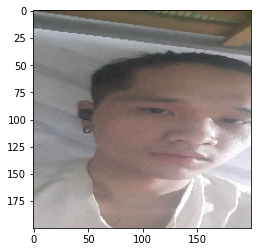

In [13]:
url='/content/z3900054942900_908b6a86de3827e83313087f97e6687e.jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])

1/1 [==============================] - 0s 43ms/step
[[5.8456981e-12 6.0773453e-07 9.9999940e-01]]
1/1 [==============================] - 0s 43ms/step
Đây là: Vũ


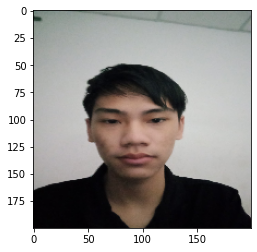

In [14]:
url='/content/z3900565108781_152087d602e2ee8ccba8dff94c0923b5.jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])